<a href="https://colab.research.google.com/github/saffarizadeh/INSY5378/blob/main/Math_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://kambizsaffari.com/Logo/College_of_Business.cmyk-hz-lg.png" width="500px"/>

# *INSY 5378 - Advanced AI*

# **The Mathematical Building Blocks of Neural Networks**

Instructor: Dr. Kambiz Saffari

---

Note: You MUST read the chapter. Going through this notebook does not replace the value of reading the chapter.

Link to the chapter: https://deeplearningwithpython.io/chapters/chapter02_mathematical-building-blocks/


This chapter covers:
- A first example of a neural network
- Tensors and tensor operations
- How neural networks learn via backpropagation and gradient descent


> *Disclaimer: This notebook is a personal study guide created for educational purposes. It summarizes and references material from "Deep Learning with Python, Third Edition" by François Chollet and Matthew Watson (Manning Publications). All rights to the original content, including text, images, and code, belong to the respective authors and publisher. This notebook is not intended for commercial use or redistribution. Please support the authors by purchasing the book at Manning.*

---
## 1. A First Look at a Neural Network

Let's build a neural network to classify handwritten digits using the **MNIST dataset** - the "Hello World" of deep learning.

<img src="https://deeplearningwithpython.io/images/ch02/MNIST-sample-digits.3d651e1d.png" width="400">

**Key terminology:**
- **Class**: A category in a classification problem
- **Sample**: A data point
- **Label**: The class associated with a sample

### 1.1 Loading the MNIST Dataset

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f"Training images shape: {train_images.shape}")
print(f"Training labels: {len(train_labels)} samples")
print(f"Sample labels: {train_labels[:10]}")
print(f"\nTest images shape: {test_images.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images shape: (60000, 28, 28)
Training labels: 60000 samples
Sample labels: [5 0 4 1 9 2 1 3 1 4]

Test images shape: (10000, 28, 28)


### 1.2 Building the Network Architecture

In [2]:
import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

**Key concepts:**
- **Layer**: A filter for data that extracts representations
- **Dense layer**: Fully connected neural layer  
- **ReLU activation**: `relu(x) = max(x, 0)`
- **Softmax**: Returns probability scores summing to 1

### 1.3 Compilation Step

Three essential components:
1. **Loss function**: Measures performance (what to minimize)
2. **Optimizer**: Updates model based on loss
3. **Metrics**: What to monitor during training

In [3]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

### 1.4 Data Preprocessing

In [4]:
# Reshape from (60000, 28, 28) to (60000, 784) and normalize to [0, 1]
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

print(f"Preprocessed shape: {train_images.shape}")
print(f"Value range: [{train_images.min()}, {train_images.max()}]")

Preprocessed shape: (60000, 784)
Value range: [0.0, 1.0]


### 1.5 Training the Model

In [5]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8724 - loss: 0.4590
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9658 - loss: 0.1171
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9808 - loss: 0.0696
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9855 - loss: 0.0498
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9902 - loss: 0.0340


### 1.6 Making Predictions and Evaluation

In [6]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)

print(f"Prediction for first digit: {predictions[0].argmax()}")
print(f"Confidence: {predictions[0].max():.6f}")
print(f"Actual label: {test_labels[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Prediction for first digit: 7
Confidence: 0.999838
Actual label: 7


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9763 - loss: 0.0736
Test accuracy: 0.9801


**Overfitting**: Test accuracy is lower than training accuracy. Models tend to perform worse on new data than training data.

---
## 2. Data Representations for Neural Networks: Tensors

**Tensors** are containers for numerical data - generalizations of matrices to arbitrary dimensions (called **axes**).

### 2.1 Scalars (Rank-0 Tensors)

A tensor containing only one number is called a **scalar** (rank-0 tensor).

In [8]:
import numpy as np

x = np.array(12)
print(f"Scalar: {x}")
print(f"Number of axes (ndim): {x.ndim}")

Scalar: 12
Number of axes (ndim): 0


### 2.2 Vectors (Rank-1 Tensors)

An array of numbers is called a **vector** (rank-1 tensor).

In [9]:
x = np.array([12, 3, 6, 14, 7])
print(f"Vector: {x}")
print(f"Number of axes (ndim): {x.ndim}")
print(f"This is a 5-dimensional vector (5 entries along one axis)")

Vector: [12  3  6 14  7]
Number of axes (ndim): 1
This is a 5-dimensional vector (5 entries along one axis)


**Important**: Don't confuse "5D vector" with "5D tensor"!
- 5D vector: 1 axis with 5 dimensions along it
- 5D tensor: 5 axes (may have any dimensions along each)

### 2.3 Matrices (Rank-2 Tensors)

An array of vectors is a **matrix** (rank-2 tensor). It has two axes (rows and columns).

In [10]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
print(f"Matrix shape: {x.shape}")
print(f"Number of axes (ndim): {x.ndim}")
print(f"First row: {x[0]}")
print(f"First column: {x[:, 0]}")

Matrix shape: (3, 5)
Number of axes (ndim): 2
First row: [ 5 78  2 34  0]
First column: [5 6 7]


### 2.4 Rank-3 and Higher-Rank Tensors

Packing matrices in an array gives a **rank-3 tensor** (cube of numbers).

In [11]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
print(f"Shape: {x.shape}")
print(f"Number of axes (ndim): {x.ndim}")

Shape: (3, 3, 5)
Number of axes (ndim): 3


### 2.5 Key Tensor Attributes

1. **Number of axes (rank)**: `ndim` in NumPy
2. **Shape**: Tuple of dimensions along each axis
3. **Data type (dtype)**: `float32`, `uint8`, etc.

In [12]:
from keras.datasets import mnist
(train_images_raw, _), _ = mnist.load_data()

print(f"Number of axes (ndim): {train_images_raw.ndim}")
print(f"Shape: {train_images_raw.shape}")
print(f"Data type (dtype): {train_images_raw.dtype}")
print(f"\nInterpretation: {train_images_raw.shape[0]} matrices of {train_images_raw.shape[1]}x{train_images_raw.shape[2]} integers")

Number of axes (ndim): 3
Shape: (60000, 28, 28)
Data type (dtype): uint8

Interpretation: 60000 matrices of 28x28 integers


### 2.6 Visualizing a Tensor Element

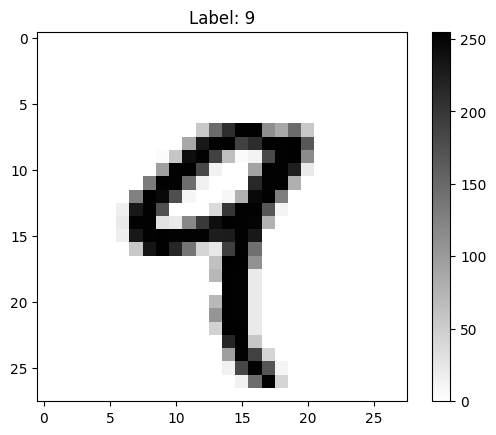

In [13]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
(train_images_raw, train_labels_raw), _ = mnist.load_data()

digit = train_images_raw[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.title(f"Label: {train_labels_raw[4]}")
plt.colorbar()
plt.show()

<img src="https://deeplearningwithpython.io/images/ch02/The-fourth-sample-in-our-dataset.8685ed9a.png" width="250">

### 2.7 Tensor Slicing

Selecting specific elements in a tensor is called **tensor slicing**.

In [14]:
from keras.datasets import mnist
(train_images_raw, _), _ = mnist.load_data()

# Select digits 10 to 99 (100 not included)
my_slice = train_images_raw[10:100]
print(f"Slice [10:100] shape: {my_slice.shape}")

# Equivalent notations
my_slice = train_images_raw[10:100, :, :]  # Explicit colons
my_slice = train_images_raw[10:100, 0:28, 0:28]  # Fully explicit
print(f"Same slice: {my_slice.shape}")

# Bottom-right 14x14 pixels of all images
bottom_right = train_images_raw[:, 14:, 14:]
print(f"Bottom-right corner: {bottom_right.shape}")

# Center crop using negative indices
center_crop = train_images_raw[:, 7:-7, 7:-7]
print(f"Center 14x14 crop: {center_crop.shape}")

Slice [10:100] shape: (90, 28, 28)
Same slice: (90, 28, 28)
Bottom-right corner: (60000, 14, 14)
Center 14x14 crop: (60000, 14, 14)


### 2.8 Data Batches

Deep learning models process data in **mini-batches**. The first axis (axis 0) is the **batch axis**.

In [15]:
from keras.datasets import mnist
(train_images_raw, _), _ = mnist.load_data()

batch_size = 128

# First batch
batch_0 = train_images_raw[:batch_size]
print(f"First batch: {batch_0.shape}")

# Second batch
batch_1 = train_images_raw[batch_size:2*batch_size]
print(f"Second batch: {batch_1.shape}")

# Nth batch (general formula)
n = 3
batch_n = train_images_raw[batch_size * n : batch_size * (n + 1)]
print(f"Batch {n}: {batch_n.shape}")

First batch: (128, 28, 28)
Second batch: (128, 28, 28)
Batch 3: (128, 28, 28)


### 2.9 Real-World Data Tensor Examples

| Data Type | Rank | Shape Format | Example |
|-----------|------|--------------|---------|
| Vector data | 2 | `(samples, features)` | 100K people × 3 attributes |
| Timeseries | 3 | `(samples, timesteps, features)` | 250 days × 390 min × 3 prices |
| Images | 4 | `(samples, height, width, channels)` | 128 images × 256 × 256 × 3 |
| Video | 5 | `(samples, frames, height, width, channels)` | 4 videos × 240 frames × 144 × 256 × 3 |

<img src="https://deeplearningwithpython.io/images/ch02/timeseries_data.a711cc5a.png" width="400">

<img src="https://deeplearningwithpython.io/images/ch02/image_data.8accee38.png" width="400">

---
## 3. The Gears of Neural Networks: Tensor Operations

A Dense layer performs:
```python
output = relu(matmul(input, W) + b)
```

Three operations:
1. **Tensor product** (`matmul`) between input and weights `W`
2. **Addition** of result and bias `b`
3. **ReLU**: `relu(x) = max(x, 0)`

### 3.1 Element-wise Operations

In [16]:
import numpy as np

def naive_relu(x):
    """Naive element-wise relu for rank-2 tensors"""
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

def naive_add(x, y):
    """Naive element-wise addition for rank-2 tensors"""
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [17]:
# NumPy's optimized versions
import numpy as np

x = np.random.random((20, 100))
y = np.random.random((20, 100))

z = x + y              # Element-wise addition
z = np.maximum(z, 0.)  # Element-wise relu

In [18]:
# Speed comparison
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print(f"NumPy vectorized: {time.time() - t0:.2f}s")

t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print(f"Naive Python loops: {time.time() - t0:.2f}s")

NumPy vectorized: 0.01s
Naive Python loops: 2.01s


### 3.2 Broadcasting

When tensor shapes differ, the smaller tensor is **broadcast** to match the larger one.

In [19]:
import numpy as np

# X: (32, 10), y: (10,)
X = np.random.random((32, 10))
y = np.random.random((10,))

# Conceptually, broadcasting does:
# 1. Add axis: (10,) -> (1, 10)
y_expanded = np.expand_dims(y, axis=0)
print(f"y expanded: {y_expanded.shape}")

# 2. Repeat along new axis: (1, 10) -> (32, 10)
Y = np.tile(y_expanded, (32, 1))
print(f"Y tiled: {Y.shape}")

# But NumPy does this automatically!
result = X + y
print(f"X + y (broadcast): {result.shape}")

y expanded: (1, 10)
Y tiled: (32, 10)
X + y (broadcast): (32, 10)


In [20]:
def naive_add_matrix_and_vector(x, y):
    """Naive broadcasting implementation"""
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

result = naive_add_matrix_and_vector(X, y)
print(f"Naive broadcast result: {result.shape}")

Naive broadcast result: (32, 10)


In [21]:
# Broadcasting with higher-rank tensors
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)  # y broadcasts to (64, 3, 32, 10)
print(f"Result shape: {z.shape}")

Result shape: (64, 3, 32, 10)


### 3.3 Tensor Product (Matrix Multiplication)

The **tensor product** (dot product, matmul) is the most important operation.

In [22]:
import numpy as np

def naive_vector_dot(x, y):
    """Dot product of two vectors -> scalar"""
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

x = np.array([1., 2., 3.])
y = np.array([4., 5., 6.])
print(f"Naive: {naive_vector_dot(x, y)}")
print(f"NumPy: {np.dot(x, y)}")
print(f"Using @: {x @ y}")

Naive: 32.0
NumPy: 32.0
Using @: 32.0


In [23]:
def naive_matrix_vector_dot(x, y):
    """Matrix-vector product -> vector"""
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

x = np.array([[1., 2.], [3., 4.], [5., 6.]])  # 3x2
y = np.array([7., 8.])  # 2
print(f"Matrix-vector product: {naive_matrix_vector_dot(x, y)}")
print(f"Using matmul: {np.matmul(x, y)}")

Matrix-vector product: [23. 53. 83.]
Using matmul: [23. 53. 83.]


In [24]:
def naive_matrix_dot(x, y):
    """Matrix-matrix product"""
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

x = np.random.random((3, 4))  # 3x4
y = np.random.random((4, 5))  # 4x5
z = naive_matrix_dot(x, y)
print(f"(3,4) @ (4,5) = {z.shape}")  # Should be (3,5)

(3,4) @ (4,5) = (3, 5)


**Shape compatibility**: `(a, b) @ (b, c) -> (a, c)`

<img src="https://deeplearningwithpython.io/images/ch02/matrix_dot_box_diagram.3dc0f796.png" width="350">

The width of x must equal the height of y. **Note:** `matmul(x, y) != matmul(y, x)`

### 3.4 Tensor Reshaping

In [25]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
print(f"Original: {x.shape}")
print(x)

print(f"\nReshaped to (6, 1):")
print(x.reshape((6, 1)))

print(f"\nReshaped to (2, 3):")
print(x.reshape((2, 3)))

# Transposition
x = np.zeros((300, 20))
print(f"\nTranspose: {x.shape} -> {np.transpose(x).shape}")

Original: (3, 2)
[[0. 1.]
 [2. 3.]
 [4. 5.]]

Reshaped to (6, 1):
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]

Reshaped to (2, 3):
[[0. 1. 2.]
 [3. 4. 5.]]

Transpose: (300, 20) -> (20, 300)


### 3.5 Geometric Interpretation

Tensor operations are **geometric transformations**:

| Operation | Transformation |
|-----------|----------------|
| Vector addition | Translation |
| Matrix product | Rotation, scaling, linear transform |
| Affine (Wx + b) | Linear transform + translation |

<img src="https://deeplearningwithpython.io/images/ch02/translation.c123da84.png" width="450" alt="2D translation as vector addition - moving an object without distortion"><br>

<img src="https://deeplearningwithpython.io/images/ch02/rotation.8f4da7c4.png" width="450" alt="2D rotation as a matrix product - rotating an object around the origin"><br>

<img src="https://deeplearningwithpython.io/images/ch02/scaling.8cca5e17.png" width="450" alt="2D scaling as a matrix product - stretching or compressing an object"><br>

<img src="https://deeplearningwithpython.io/images/ch02/affine_transform.80be4403.png" width="450" alt="Affine transform combining linear transformation and translation">

### 3.6 Why We Need Activation Functions

**Key insight:** Multiple affine transforms = single affine transform!
```
affine2(affine1(x)) = (W2 @ W1) @ x + (W2 @ b1 + b2)
```
Without activations, deep networks = linear models!

**ReLU breaks linearity**, enabling complex nonlinear transformations:

<img src="https://deeplearningwithpython.io/images/ch02/function.4b000cb3.png" width="450" alt="A continuous smooth function f(x) = y plotted as a curve">

### 3.7 Deep Learning as Geometric Unfolding

Neural networks untangle complex data manifolds through simple transformations.

<img src="https://deeplearningwithpython.io/images/ch02/geometric_interpretation_4.f8123b83.png" width="700" alt="Uncrumpling a complicated data manifold - neural networks separating tangled data">

---
## 4. The Engine of Neural Networks: Gradient-Based Optimization

Each layer: `output = relu(matmul(input, W) + b)`

`W` and `b` are **trainable parameters** (weights) - initially random, gradually adjusted through training.

### 4.1 The Training Loop

Repeat until loss is sufficiently low:
1. **Draw** a batch of training samples `x` and targets `y_true`
2. **Forward pass**: Run model on `x` to get predictions `y_pred`
3. **Compute loss**: Measure mismatch between `y_pred` and `y_true`
4. **Update weights**: Adjust all weights to reduce the loss

Step 4 is the challenge: How do we know which direction to adjust each weight?

### 4.2 The Naive Approach (Don't Do This!)

For each weight:
1. Freeze all other weights
2. Try different values
3. Keep the one that reduces loss

**Problem:** Requires 2 forward passes per coefficient. With millions of parameters, this is impossibly slow!

**Solution:** Use **gradient descent** - leverage that all operations are **differentiable**.

### 4.3 What's a Derivative?

Consider a continuous, smooth function `f(x) = y`:

<img src="https://deeplearningwithpython.io/images/ch02/function.4b000cb3.png" width="400" alt="A continuous smooth function f(x) = y plotted as a curve">

Because the function is **continuous**, small changes in `x` cause small changes in `y`:

<img src="https://deeplearningwithpython.io/images/ch02/continuity.98fd80b7.png" width="400" alt="Continuity - a small change in x results in a small change in y">

Because the function is **smooth**, around point `p` we can approximate `f` linearly:
```
f(x + epsilon_x) ≈ y + a * epsilon_x
```

The slope `a` is the **derivative** of `f` at point `p`.

<img src="https://deeplearningwithpython.io/images/ch02/derivation.306de198.png" width="400" alt="Derivative of f at point p - the slope of the local linear approximation">

**What the derivative tells us:**
- `a < 0`: increasing `x` **decreases** `f(x)`
- `a > 0`: increasing `x` **increases** `f(x)`
- `|a|` tells us how quickly `f(x)` changes

**Key insight for optimization:** To **minimize** `f(x)`, move `x` **opposite to the derivative**!

In [26]:
import numpy as np

def f(x):
    return x ** 2  # Simple parabola, minimum at x=0

def numerical_derivative(f, x, epsilon=1e-7):
    """Approximate derivative using finite differences"""
    return (f(x + epsilon) - f(x)) / epsilon

# The derivative of x^2 is 2x
x = 3.0
print(f"f(x) = x² at x={x}: f({x}) = {f(x)}")
print(f"Numerical derivative: {numerical_derivative(f, x):.4f}")
print(f"Analytical derivative (2x): {2*x}")

# To minimize f(x), move opposite to derivative
learning_rate = 0.1
derivative = numerical_derivative(f, x)
x_new = x - learning_rate * derivative

print(f"\nGradient step: {x} -> {x_new}")
print(f"Loss decreased: {f(x)} -> {f(x_new)}")

f(x) = x² at x=3.0: f(3.0) = 9.0
Numerical derivative: 6.0000
Analytical derivative (2x): 6.0

Gradient step: 3.0 -> 2.3999999912119847
Loss decreased: 9.0 -> 5.759999957817526


### 4.4 Derivative of Tensor Operations: The Gradient

**Gradient** = generalization of derivatives to functions with tensor inputs.

For a scalar function, the derivative = slope of the curve.
For a tensor function, the gradient = curvature of the multidimensional surface.

**In machine learning:**
```python
x        # Input (a sample)
W        # Weights (parameters)
y_true   # Target
loss     # Loss function

y_pred = matmul(x, W)
loss_value = loss(y_pred, y_true)

# grad(loss_value, W) is a tensor same shape as W
# Each element grad(loss_value, W)[i,j] tells us:
# "How does loss change when we modify W[i,j]?"
```

**Partial derivatives:** The gradient combines partial derivatives for each element of W.

**Update rule:** Move `W` opposite to gradient:
```python
W_new = W - step * grad(loss, W)
```

In [27]:
import numpy as np

def f(W):
    """f(W) = W[0]^2 + W[1]^2 (bowl-shaped surface, minimum at origin)"""
    return W[0]**2 + W[1]**2

def gradient_f(W):
    """Gradient: [2*W[0], 2*W[1]]"""
    return np.array([2*W[0], 2*W[1]])

# Start somewhere
W = np.array([3.0, 4.0])
print(f"Start: W = {W}, f(W) = {f(W)}")
print(f"Gradient: {gradient_f(W)}")

# Gradient descent step
learning_rate = 0.1
W_new = W - learning_rate * gradient_f(W)
print(f"\nAfter step: W = {W_new}")
print(f"f(W) decreased: {f(W)} -> {f(W_new)}")

Start: W = [3. 4.], f(W) = 25.0
Gradient: [6. 8.]

After step: W = [2.4 3.2]
f(W) decreased: 25.0 -> 16.0


In [28]:
# Multiple gradient descent steps
W = np.array([3.0, 4.0])
learning_rate = 0.1

print("Gradient Descent Progress:")
print(f"Step 0: W = {W}, f(W) = {f(W):.4f}")

for step in range(1, 11):
    W = W - learning_rate * gradient_f(W)
    print(f"Step {step}: W = [{W[0]:.4f}, {W[1]:.4f}], f(W) = {f(W):.4f}")

print(f"\nMinimum at W = [0, 0] with f(W) = 0")

Gradient Descent Progress:
Step 0: W = [3. 4.], f(W) = 25.0000
Step 1: W = [2.4000, 3.2000], f(W) = 16.0000
Step 2: W = [1.9200, 2.5600], f(W) = 10.2400
Step 3: W = [1.5360, 2.0480], f(W) = 6.5536
Step 4: W = [1.2288, 1.6384], f(W) = 4.1943
Step 5: W = [0.9830, 1.3107], f(W) = 2.6844
Step 6: W = [0.7864, 1.0486], f(W) = 1.7180
Step 7: W = [0.6291, 0.8389], f(W) = 1.0995
Step 8: W = [0.5033, 0.6711], f(W) = 0.7037
Step 9: W = [0.4027, 0.5369], f(W) = 0.4504
Step 10: W = [0.3221, 0.4295], f(W) = 0.2882

Minimum at W = [0, 0] with f(W) = 0


### 4.5 Stochastic Gradient Descent (SGD)

The algorithm:
1. Draw a batch of samples `x` and targets `y_true`
2. Forward pass: get predictions `y_pred`
3. Compute loss
4. **Backward pass**: Compute gradient of loss w.r.t. weights
5. Update: `W -= learning_rate * gradient`

**Stochastic** = random batches.

<img src="https://deeplearningwithpython.io/images/ch02/sgd_explained_1.0535e152.png" width="400" alt="Stochastic gradient descent down a 1D loss curve with one learnable parameter">

**Learning rate matters:**
- Too small: Slow convergence, stuck in local minima
- Too large: Overshoots, bounces randomly

**SGD Variants:**
- True SGD: 1 sample at a time
- Mini-batch SGD: Small batches (typical)
- Batch gradient descent: All data at once

<img src="https://deeplearningwithpython.io/images/ch02/gradient_descent_3d.85d77c73.png" width="500" alt="Gradient descent down a 2D loss surface with two learnable parameters">

### 4.6 SGD with Momentum

**Problem:** SGD can get stuck in local minima.

<img src="https://deeplearningwithpython.io/images/ch02/global_minimum.8f000c0a.png" width="500" alt="Local minimum versus global minimum on a loss curve">

**Solution: Momentum** - consider past velocity, like a ball rolling downhill.

In [29]:
def sgd_with_momentum(w, gradient, velocity, learning_rate=0.01, momentum=0.9):
    """
    Update weights using momentum.
    Velocity accumulates past gradients for faster, smoother convergence.
    """
    velocity = momentum * velocity - learning_rate * gradient
    w = w + velocity
    return w, velocity

# Demo
w = 5.0
velocity = 0.0

print("SGD with Momentum (minimizing f(w) = w²):")
for step in range(10):
    gradient = 2 * w  # d/dw(w²) = 2w
    w, velocity = sgd_with_momentum(w, gradient, velocity)
    print(f"Step {step+1}: w = {w:.4f}, velocity = {velocity:.4f}")

SGD with Momentum (minimizing f(w) = w²):
Step 1: w = 4.9000, velocity = -0.1000
Step 2: w = 4.7120, velocity = -0.1880
Step 3: w = 4.4486, velocity = -0.2634
Step 4: w = 4.1225, velocity = -0.3261
Step 5: w = 3.7466, velocity = -0.3759
Step 6: w = 3.3333, velocity = -0.4133
Step 7: w = 2.8947, velocity = -0.4386
Step 8: w = 2.4421, velocity = -0.4526
Step 9: w = 1.9859, velocity = -0.4562
Step 10: w = 1.5356, velocity = -0.4503


### 4.7 The Chain Rule

For composed functions `fg(x) = f(g(x))`:
```python
grad(y, x) = grad(y, x1) * grad(x1, x)
```
where `x1 = g(x)` and `y = f(x1)`.

For longer chains:
```python
def fghj(x):
    x1 = j(x)
    x2 = h(x1)
    x3 = g(x2)
    y = f(x3)
    return y

grad(y, x) = grad(y, x3) * grad(x3, x2) * grad(x2, x1) * grad(x1, x)
```

In [30]:
import numpy as np

# Define functions
def g(x): return x ** 2      # g(x) = x²
def f(x): return 3 * x + 1   # f(x) = 3x + 1
def fg(x): return f(g(x))    # f(g(x)) = 3x² + 1

# Derivatives
def grad_g(x): return 2 * x  # d/dx(x²) = 2x
def grad_f(x): return 3      # d/dx(3x + 1) = 3

# Chain rule: grad(fg, x) = grad(f, g(x)) * grad(g, x)
x = 2.0
chain_rule = grad_f(g(x)) * grad_g(x)
direct = 6 * x  # d/dx(3x² + 1) = 6x

print(f"f(g(x)) = 3x² + 1 at x={x}: {fg(x)}")
print(f"Chain rule: grad_f(g(x)) * grad_g(x) = {grad_f(g(x))} * {grad_g(x)} = {chain_rule}")
print(f"Direct (6x): {direct}")

f(g(x)) = 3x² + 1 at x=2.0: 13.0
Chain rule: grad_f(g(x)) * grad_g(x) = 3 * 4.0 = 12.0
Direct (6x): 12.0


### 4.8 Backpropagation with Computation Graphs

A **computation graph** is a directed acyclic graph of operations.

<img src="https://deeplearningwithpython.io/images/ch02/a_first_computation_graph.90dec1fc.png" width="200" alt="Computation graph representation of a two-layer neural network model">

**Simple example:**

<img src="https://deeplearningwithpython.io/images/ch02/basic_computation_graph.f3e3c75a.png" width="200" alt="Basic computation graph with variables w, b, x, and loss calculation">

Variables: `w`, `b`, input `x`, target `y_true`
- `x1 = x * w`
- `x2 = x1 + b`
- `loss = |y_true - x2|`

**Forward Pass** (compute values top to bottom):

<img src="https://deeplearningwithpython.io/images/ch02/basic_computation_graph_with_values.e15cd230.png" width="250" alt="Forward pass through computation graph showing computed values at each node">

With `x=2, w=3, b=1, y_true=4`:
- `x1 = 2 * 3 = 6`
- `x2 = 6 + 1 = 7`
- `loss = |4 - 7| = 3`

**Backward Pass** (compute gradients bottom to top):

<img src="https://deeplearningwithpython.io/images/ch02/basic_computation_graph_backward.9e975200.png" width="600" alt="Backward pass through computation graph showing gradients at each edge">

For each edge: "How much does output vary when input varies?"
- `grad(loss, x2) = -1` (since y_true < x2)
- `grad(x2, x1) = 1`
- `grad(x2, b) = 1`
- `grad(x1, w) = x = 2`

**Chain Rule Application:**

<img src="https://deeplearningwithpython.io/images/ch02/path_in_backward_graph.fe91e7d0.png" width="600" alt="Path from loss to w in the backward graph for computing gradients via chain rule">

```
grad(loss, w) = grad(loss, x2) * grad(x2, x1) * grad(x1, w)
              = -1 * 1 * 2 = -2

grad(loss, b) = grad(loss, x2) * grad(x2, b)  
              = -1 * 1 = -1
```

**This is backpropagation!** We "back propagate" loss contributions through the graph.

In [31]:
# Manual backpropagation
x = 2.0
w = 3.0
b = 1.0
y_true = 4.0

# Forward pass
x1 = x * w          # 6
x2 = x1 + b         # 7
loss = abs(y_true - x2)  # 3

print("Forward Pass:")
print(f"x1 = x * w = {x} * {w} = {x1}")
print(f"x2 = x1 + b = {x1} + {b} = {x2}")
print(f"loss = |y_true - x2| = |{y_true} - {x2}| = {loss}")

# Backward pass
grad_loss_x2 = -1 if y_true < x2 else 1  # -1
grad_x2_x1 = 1
grad_x2_b = 1
grad_x1_w = x  # 2

# Chain rule
grad_loss_w = grad_loss_x2 * grad_x2_x1 * grad_x1_w
grad_loss_b = grad_loss_x2 * grad_x2_b

print("\nBackward Pass (Chain Rule):")
print(f"grad(loss, w) = {grad_loss_x2} * {grad_x2_x1} * {grad_x1_w} = {grad_loss_w}")
print(f"grad(loss, b) = {grad_loss_x2} * {grad_x2_b} = {grad_loss_b}")

# Gradient descent step
lr = 0.1
w_new = w - lr * grad_loss_w
b_new = b - lr * grad_loss_b
loss_new = abs(y_true - (x * w_new + b_new))

print(f"\nAfter gradient step:")
print(f"w: {w} -> {w_new}, b: {b} -> {b_new}")
print(f"loss: {loss} -> {loss_new}")

Forward Pass:
x1 = x * w = 2.0 * 3.0 = 6.0
x2 = x1 + b = 6.0 + 1.0 = 7.0
loss = |y_true - x2| = |4.0 - 7.0| = 3.0

Backward Pass (Chain Rule):
grad(loss, w) = -1 * 1 * 2.0 = -2.0
grad(loss, b) = -1 * 1 = -1

After gradient step:
w: 3.0 -> 3.2, b: 1.0 -> 1.1
loss: 3.0 -> 3.5


### 4.9 Automatic Differentiation

Modern frameworks compute gradients automatically. You write the forward pass; they handle gradients!

In [33]:
import tensorflow as tf

# GradientTape records operations
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x ** 2

grad = tape.gradient(y, x)
print(f"x = {x.numpy()}")
print(f"y = x² = {y.numpy()}")
print(f"dy/dx = 2x = {grad.numpy()} (expected: {2 * x.numpy()}")

x = 3.0
y = x² = 9.0
dy/dx = 2x = 6.0 (expected: 6.0


In [34]:
# Multiple variables
import tensorflow as tf

w = tf.Variable(3.0)
b = tf.Variable(1.0)
x = tf.constant(2.0)
y_true = tf.constant(4.0)

with tf.GradientTape() as tape:
    y_pred = x * w + b
    loss = tf.abs(y_true - y_pred)

gradients = tape.gradient(loss, [w, b])
print(f"y_pred = {y_pred.numpy()}, loss = {loss.numpy()}")
print(f"grad_w = {gradients[0].numpy()}, grad_b = {gradients[1].numpy()}")

y_pred = 7.0, loss = 3.0
grad_w = 2.0, grad_b = 1.0


---
## 5. Looking Back at Our First Example

<img src="https://deeplearningwithpython.io/images/ch02/deep-learning-in-3-figures-3_alt.40aa865d.png" width="500" alt="Deep learning overview - relationship between model, layers, loss function, and optimizer">

1. **Model**: Layers chained together, mapping inputs to predictions
2. **Loss function**: Compares predictions to targets
3. **Optimizer**: Uses gradients to update weights

---
## 6. Reimplementing from Scratch

### 6.1 A Simple Dense Layer

In [35]:
import keras
from keras import ops

class NaiveDense:
    def __init__(self, input_size, output_size, activation=None):
        self.activation = activation
        self.W = keras.Variable(shape=(input_size, output_size), initializer="uniform")
        self.b = keras.Variable(shape=(output_size,), initializer="zeros")

    def __call__(self, inputs):
        x = ops.matmul(inputs, self.W) + self.b
        if self.activation:
            x = self.activation(x)
        return x

    @property
    def weights(self):
        return [self.W, self.b]

### 6.2 A Simple Sequential Model

In [36]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x

    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

# Create model
model = NaiveSequential([
    NaiveDense(28 * 28, 512, activation=ops.relu),
    NaiveDense(512, 10, activation=ops.softmax),
])
print(f"Model has {len(model.weights)} weight tensors")

Model has 4 weight tensors


### 6.3 Batch Generator

In [37]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index:self.index + self.batch_size]
        labels = self.labels[self.index:self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### 6.4 Training Step

In [38]:
import tensorflow as tf
from keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = ops.sparse_categorical_crossentropy(labels_batch, predictions)
        average_loss = ops.mean(per_sample_losses)

    gradients = tape.gradient(average_loss, model.weights)
    optimizer.apply_gradients(zip(gradients, model.weights))
    return average_loss

### 6.5 Training Loop

In [39]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        batch_gen = BatchGenerator(images, labels, batch_size)
        for batch_idx in range(batch_gen.num_batches):
            images_batch, labels_batch = batch_gen.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_idx % 100 == 0:
                print(f"  Batch {batch_idx}: loss = {float(loss):.4f}")

### 6.6 Train and Evaluate

In [40]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255

# Fresh model
model = NaiveSequential([
    NaiveDense(28 * 28, 512, activation=ops.relu),
    NaiveDense(512, 10, activation=ops.softmax),
])
optimizer = optimizers.SGD(learning_rate=1e-3)

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
  Batch 0: loss = 2.3164
  Batch 100: loss = 2.2866
  Batch 200: loss = 2.2534
  Batch 300: loss = 2.2167
  Batch 400: loss = 2.1768
Epoch 2/10
  Batch 0: loss = 2.1355
  Batch 100: loss = 2.1261
  Batch 200: loss = 2.0769
  Batch 300: loss = 2.0461
  Batch 400: loss = 2.0079
Epoch 3/10
  Batch 0: loss = 1.9548
  Batch 100: loss = 1.9638
  Batch 200: loss = 1.8927
  Batch 300: loss = 1.8648
  Batch 400: loss = 1.8307
Epoch 4/10
  Batch 0: loss = 1.7614
  Batch 100: loss = 1.7896
  Batch 200: loss = 1.6949
  Batch 300: loss = 1.6734
  Batch 400: loss = 1.6483
Epoch 5/10
  Batch 0: loss = 1.5626
  Batch 100: loss = 1.6084
  Batch 200: loss = 1.4938
  Batch 300: loss = 1.4833
  Batch 400: loss = 1.4722
Epoch 6/10
  Batch 0: loss = 1.3735
  Batch 100: loss = 1.4329
  Batch 200: loss = 1.3044
  Batch 300: loss = 1.3092
  Batch 400: loss = 1.3140
Epoch 7/10
  Batch 0: loss = 1.2070
  Batch 100: loss = 1.2741
  Batch 200: loss = 1.1389
  Batch 300: loss = 1.1601
  Batch 400: loss =

In [41]:
# Evaluate
predictions = model(test_images)
predicted_labels = ops.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
accuracy = float(ops.mean(ops.cast(matches, "float32")))
print(f"\nTest accuracy: {accuracy:.4f}")


Test accuracy: 0.8361


---
## Summary

### Tensors
- Foundation of ML: defined by **dtype**, **rank**, **shape**
- Manipulated via tensor operations (addition, matmul, element-wise)
- Operations = geometric transformations

### Neural Networks
- Chains of tensor operations with **trainable weights**
- Weights store learned knowledge
- Activation functions enable nonlinearity

### Derivatives & Gradients
- **Derivative**: Slope at a point; how output changes with input
- **Gradient**: Multi-dimensional derivative; vector of partial derivatives
- **Key insight**: Move opposite to gradient to minimize

### Training via Gradient Descent
- **Learning** = minimizing loss by adjusting weights
- **Mini-batch SGD**: Random batches, compute gradients, update weights
- **Backpropagation**: Chain rule through computation graph
- **Automatic differentiation**: Frameworks compute gradients for you

### Key Components
- **Loss function**: What to minimize
- **Optimizer**: How to update weights (SGD, Adam, etc.)